In [2]:
# Libraries 
import pandas as pd
import numpy as np
import math 
from typing import List
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import rarfile

# Libraries to help with data visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

# Dataset ocupacio Ciencies i Biociencies

INFORMATION:

- Period: 01/01/2022 to 31/12/2022

In [4]:
csv_path_ocupacio = r"C:\Users\Miguel\OneDrive\Escritorio\2n curs\2n Semestre\Synthesis Project I\Project\work_project\data\ciencies_biociencies\ocupacio_ciencies_biociencies_2022.csv"
ocupacio = pd.read_csv(csv_path_ocupacio, delimiter = ';')

In [5]:
ocupacio.head()

,Data inicial,Hora inicial,Data final,Hora final,Total hores,Espai,Estudi,Activitat,Alumnes matriculats,Modalitat docencia,Observacions
0,07/01/2022,08:30,07/01/2022,10:00,"1,5",C3/012,10086 Física i Química,102491 Redacció i Execució de Projectes - 1,Sense grup de matricula,,
1,,,,,,C3/012,10066 Química,102491 Redacció i Execució de Projectes - 1,Sense grup de matricula,,
2,07/01/2022,09:00,07/01/2022,10:00,1,C5/028,10015 Matemàtiques,100118 Sistemes Dinàmics - 1,Sense grup de matricula,,
3,,,,,,C5/028,10040 Física + matemàtiques,100118 Sistemes Dinàmics - 1,Sense grup de matricula,,
4,07/01/2022,09:00,07/01/2022,10:00,1,C3/011,10069 Nanociència i Nanotecnologia,103295 Nanotecnologia per a la Informació i le...,7,,


In [6]:
ocupacio.columns

Index(['Data inicial', 'Hora inicial', 'Data final', 'Hora final',
       'Total hores', 'Espai', 'Estudi', 'Activitat', 'Alumnes matriculats',
       'Modalitat docencia', 'Observacions'],
      dtype='object')

In [7]:
ocupacio.shape

(52961, 11)

In [8]:
ocupacio.isna().sum()

Data inicial              0
Hora inicial              0
Data final                0
Hora final                0
Total hores               0
Espai                     0
Estudi                 5025
Activitat                 0
Alumnes matriculats       0
Modalitat docencia        0
Observacions              0
dtype: int64

In the dataset we have lot of observations without any information about the time, date and hours because they correspond to the same activity as the one they have above with the predefined date and hour. The only thing that changes in comparison with the observation above with the defined date and hour of the activity is the column 'Estudi' because this means that other students of another grade different from the above observation are also doing the corresponding activity (usually a lesson). As these observations do not give us any relevant info and the information we need is already described in the observation where the dates an hours are defined we can remove them to avoid having problems when we analyze the data:

In [9]:
ocupacio = ocupacio[(ocupacio['Data inicial'] != " ") & (ocupacio['Hora inicial'] != " ") & (ocupacio['Data final'] != " ") & (ocupacio['Hora final'] != " ") & (ocupacio['Total hores'] != " ")]
ocupacio = ocupacio.reset_index(drop=True)

In [10]:
ocupacio.shape

(37166, 11)

In [11]:
ocupacio.head()

,Data inicial,Hora inicial,Data final,Hora final,Total hores,Espai,Estudi,Activitat,Alumnes matriculats,Modalitat docencia,Observacions
0,07/01/2022,08:30,07/01/2022,10:00,"1,5",C3/012,10086 Física i Química,102491 Redacció i Execució de Projectes - 1,Sense grup de matricula,,
1,07/01/2022,09:00,07/01/2022,10:00,1,C5/028,10015 Matemàtiques,100118 Sistemes Dinàmics - 1,Sense grup de matricula,,
2,07/01/2022,09:00,07/01/2022,10:00,1,C3/011,10069 Nanociència i Nanotecnologia,103295 Nanotecnologia per a la Informació i le...,7,,
3,07/01/2022,09:00,07/01/2022,10:00,1,C5/247,10040 Física + matemàtiques,100137 Mecànica i Relativitat - 1,Sense grup de matricula,,
4,07/01/2022,09:00,07/01/2022,10:00,1,C3/022,10015 Matemàtiques,100090 Física - 1,66,,


In [12]:
ocupacio['Total hores'].value_counts()

1       23173
2        7597
3        3502
4        1641
1,5       385
12        198
2,5       185
5         104
3,5       101
4,5        73
11         32
6          26
10         24
8          20
9          20
10,5       19
5,5        16
12,5       14
0,5         9
7           6
9,5         6
11,5        4
6,5         4
4,25        4
1,75        1
7,5         1
8,5         1
Name: Total hores, dtype: int64

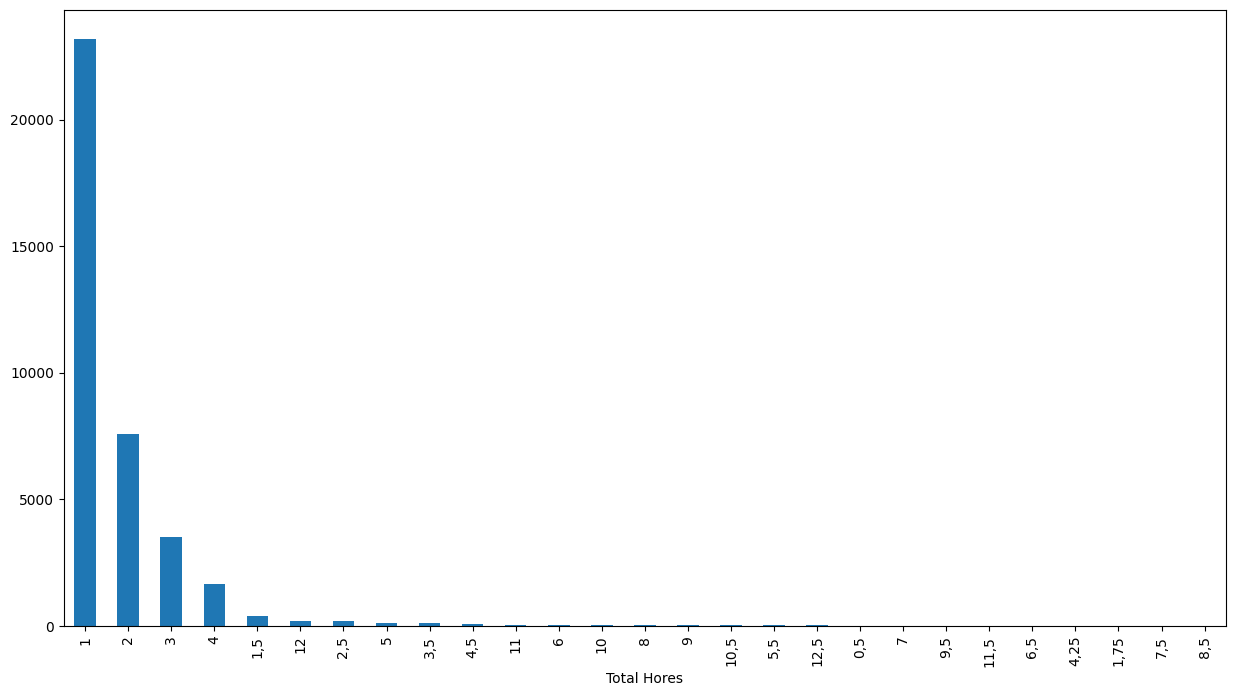

In [13]:
ocupacio['Total hores'].value_counts().plot(kind='bar', figsize=(15,8))

plt.xlabel("Total Hores")


# display the plot
plt.show()

In [14]:
ocupacio['Alumnes matriculats'].value_counts()

Sense grup de matricula    13636
0                           5025
61                           617
59                           547
58                           477
                           ...  
4                              7
111                            6
107                            3
114                            2
110                            2
Name: Alumnes matriculats, Length: 115, dtype: int64

<Axes: >

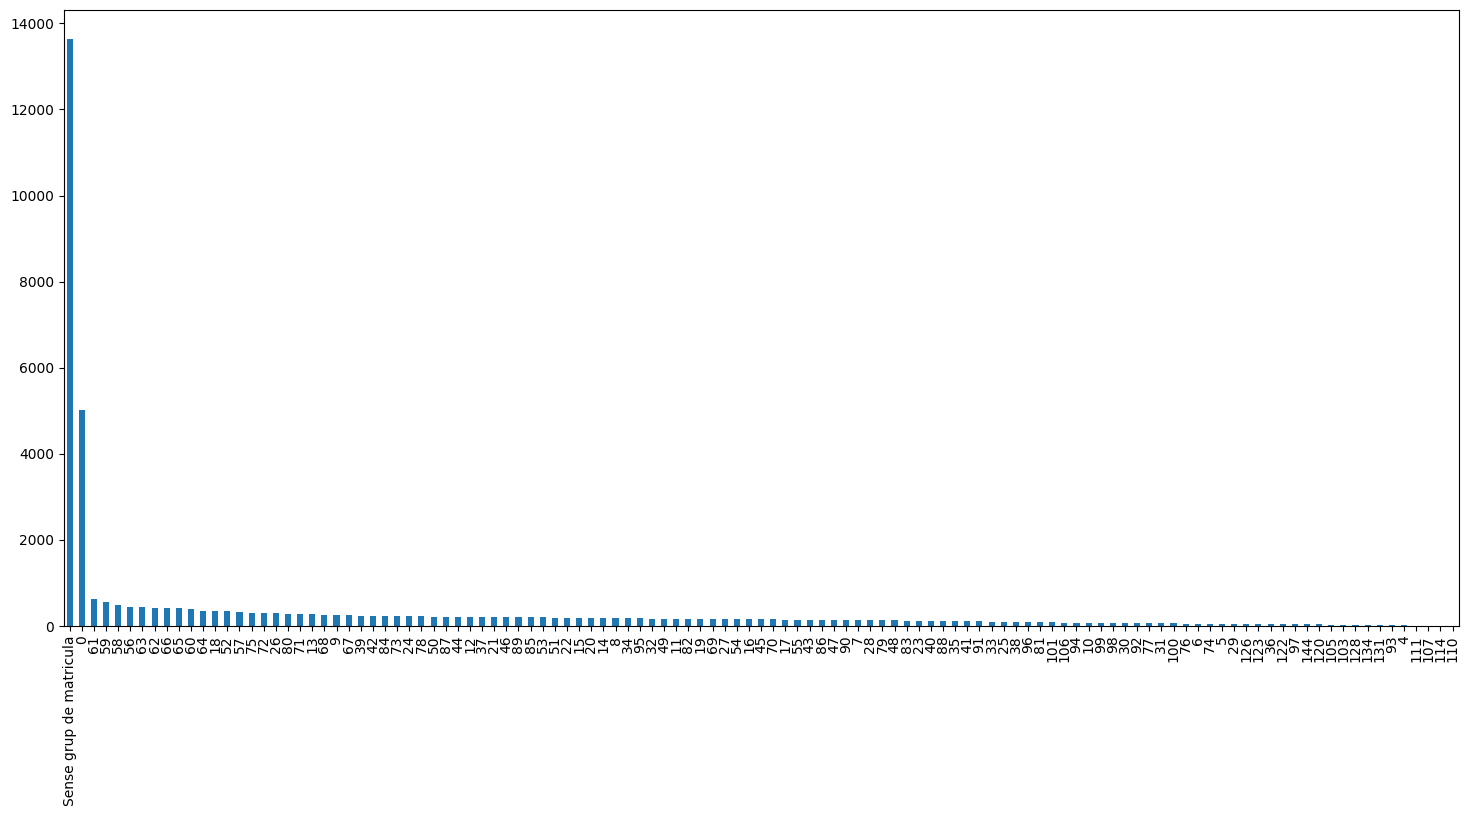

In [15]:
ocupacio['Alumnes matriculats'].value_counts().plot(kind='bar', figsize=(18,8))

# Consum mensual gas Ciencies i Biociencies  dataset

INFORMATION:
- Data from January 2018 to December 2022

In [17]:
csv_path_gas = r"C:\Users\Miguel\OneDrive\Escritorio\2n curs\2n Semestre\Synthesis Project I\Project\work_project\data\ciencies_biociencies\Consum_mensual_gas_2018-2022_ciencies_biociencies.csv"
consum_gas = pd.read_csv(csv_path_gas, delimiter=';')

In [ ]:
consum_gas

,Mes,Consum [kWh]
0,Gen 2018,643711
1,Feb 2018,704217
2,Mar 2018,651788
3,Abr 2018,264580
4,Mai 2018,13743
...,...,...
56,Set 2022,5588
57,Oct 2022,12510
58,Nov 2022,269764
59,Des 2022,370235


In [18]:
consum_gas.columns

Index(['Mes', 'Consum [kWh]'], dtype='object')

In [19]:
consum_gas.info

<bound method DataFrame.info of          Mes  Consum [kWh]
0   Gen 2018        643711
1   Feb 2018        704217
2   Mar 2018        651788
3   Abr 2018        264580
4   Mai 2018         13743
..       ...           ...
56  Set 2022          5588
57  Oct 2022         12510
58  Nov 2022        269764
59  Des 2022        370235
60    Totals      14926707

[61 rows x 2 columns]>

In [20]:
consum_gas.isna().sum()

Mes             0
Consum [kWh]    0
dtype: int64

We remove the last observation as it give us the total consumption in 5 years and at the moment we do not need this value

In [21]:
consum_gas = consum_gas[:-1]

Let's calculate the average consumption in each month:

In [22]:
Months_list = ['Gen', 'Feb', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Oct', 'Nov', 'Des']
Average_list = []
for month in Months_list:
    summmation_value = 0
    for i, month_dataset in enumerate(consum_gas['Mes']):
        if month in month_dataset:
            summmation_value += consum_gas.iloc[i]['Consum [kWh]']
    Average_list.append(summmation_value/5)
            
print(Average_list)   

[691422.0, 587690.4, 468097.2, 219327.8, 31114.0, 6960.4, 5312.2, 1996.2, 8245.8, 68814.8, 397930.0, 498430.6]


In [23]:
df_average = pd.DataFrame(Average_list, columns = ['Month Average Consumption'])
print(df_average)

    Month Average Consumption
0                    691422.0
1                    587690.4
2                    468097.2
3                    219327.8
4                     31114.0
5                      6960.4
6                      5312.2
7                      1996.2
8                      8245.8
9                     68814.8
10                   397930.0
11                   498430.6


In [24]:
print('Max Average Month Consumption is: ', df_average['Month Average Consumption'].idxmax(), df_average['Month Average Consumption'].max())

Max Average Month Consumption is:  0 691422.0


The month 0 corresponds to Januray

In [25]:
print('Min Average Month Consumption is: ', df_average['Month Average Consumption'].idxmin(), df_average['Month Average Consumption'].min())

Min Average Month Consumption is:  7 1996.2


The month 7 corresponds to August, what is normal as is the month where the UAB has less activity

Now let's visualize how the month consumption changes depending on the month for example in the year 2022 :

In [26]:
consum_gas_2022 = consum_gas[48:]

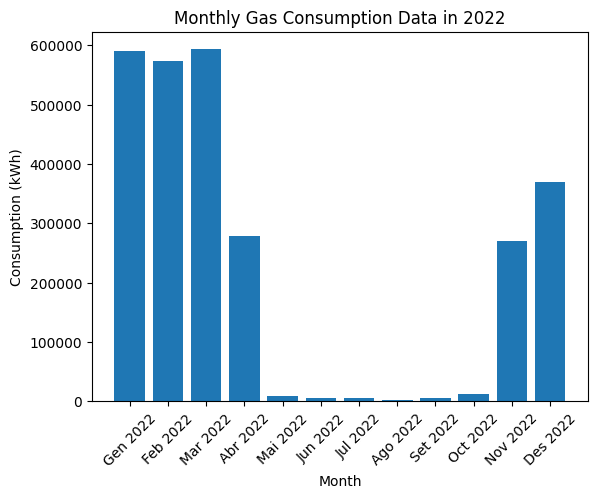

In [27]:
plt.bar(consum_gas_2022['Mes'], consum_gas_2022['Consum [kWh]'])
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Consumption (kWh)")
plt.title("Monthly Gas Consumption Data in 2022")
plt.show()

Now let's visualize how the month consumption changes depending on the month in the year when the pandemia occurred in order to see how the telecommuting affects to the consumption :

In [28]:
consum_gas_covid = consum_gas[26:39]

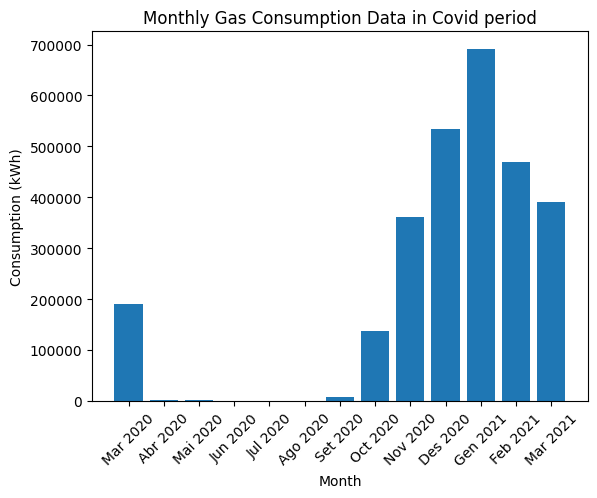

In [29]:
plt.bar(consum_gas_covid['Mes'], consum_gas_covid['Consum [kWh]'])
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Consumption (kWh)")
plt.title("Monthly Gas Consumption Data in Covid period")
plt.show()

In [30]:
total_consumption2022_gas = consum_gas_2022['Consum [kWh]'].sum()

total_consumptionCovid_gas = consum_gas_covid['Consum [kWh]'].sum()

reduction_percentage_gas = "%.2f" % (((total_consumption2022_gas - total_consumptionCovid_gas)/total_consumption2022_gas)*100)

print("The total percentage reduction of gas consumption during the Covid period with respect to a current year like 2022 is:",reduction_percentage_gas,"%")

The total percentage reduction of gas consumption during the Covid period with respect to a current year like 2022 is: -2.69 %


Let's calculate how much the gas consumption was reduced in the Covid period with respect to a current year like 2022:

# Consum horari Ciencies i Biociencies dataset

INFORMATION:

- Period: = 01/01/2018 to 31/12/22
- C Ciències Trafo 1 (General) [kWh] :
    - Total : 10.887.735,20
    - Average : 248,44
    - Median : 200,27
    - Max : 813,78
    - Min : 6,36
- C Ciències Trafo 2 (General) [kWh] :
    - Total : 7.010.937,53
    - Average : 159,58
    - Median : 118, 3
    - Max : 536,00
    - Min : 0,00

In [32]:
csv_consum = r"C:\Users\Miguel\OneDrive\Escritorio\2n curs\2n Semestre\Synthesis Project I\Project\work_project\data\ciencies_biociencies\Consum_horari_electricitat_ciencies_biociencies_2018-2022.csv"
consum_horari = pd.read_csv(csv_consum, sep=';')

In [ ]:
consum_horari.columns

Index(['Date', 'Hour', 'C Ciències Trafo 1 (General) [kWh] [C-Ciencies]',
       'C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'],
      dtype='object')

In [33]:
consum_horari.shape

(43824, 4)

In [34]:
consum_horari.isna().sum()

Date                                               0
Hour                                               0
C Ciències Trafo 1 (General) [kWh] [C-Ciencies]    0
C Ciències Trafo 2 (General) [kWh] [C-Ciencies]    0
dtype: int64

In [35]:
#Replace , by . 
consum_horari['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'] = consum_horari['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'].str.replace(',', '.')
consum_horari['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'] = consum_horari['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'].str.replace(',', '.')

# Convert to float
consum_horari['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'] = consum_horari['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'].astype(float)
consum_horari['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'] = consum_horari['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'].astype(float)


<Axes: xlabel='Hour', ylabel='C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'>

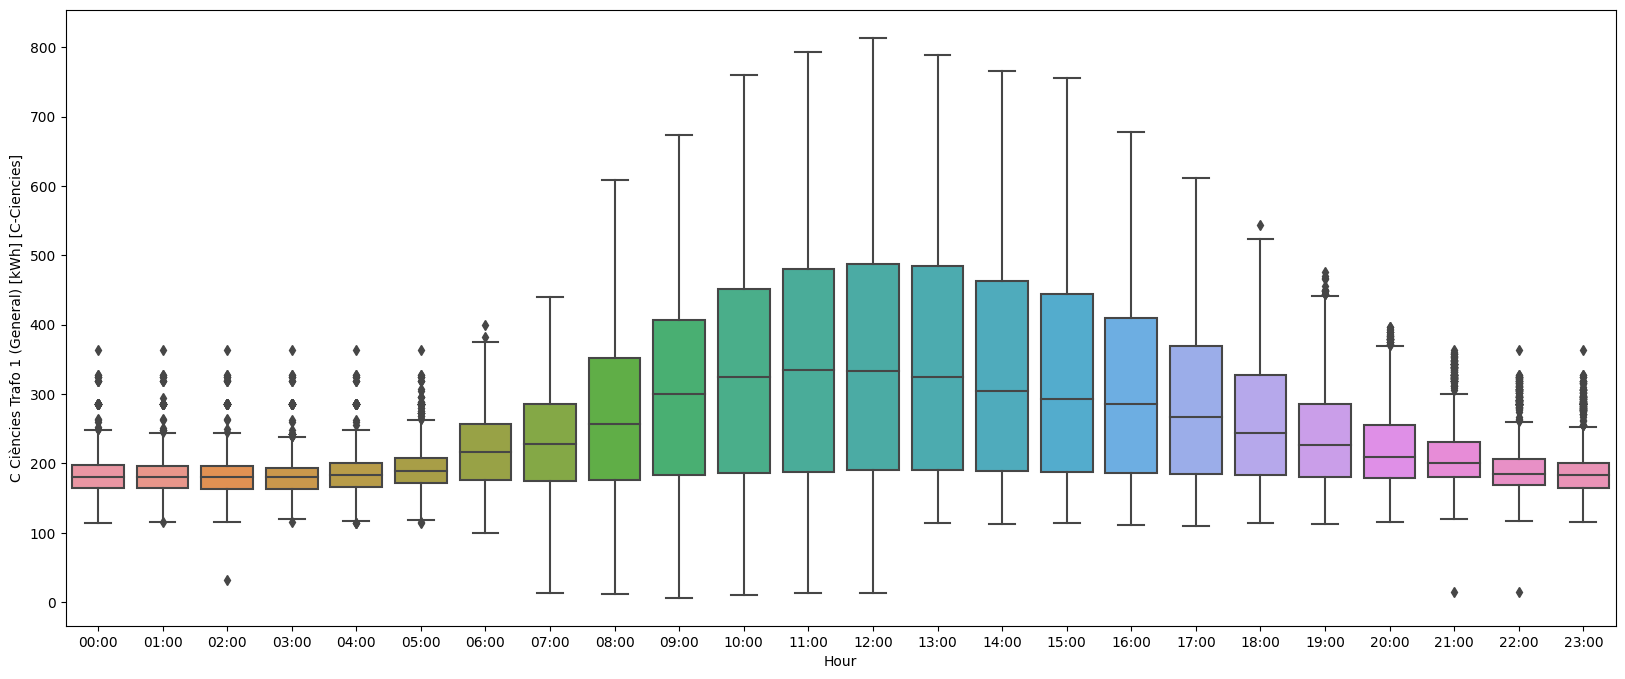

In [36]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=consum_horari, x="Hour", y="C Ciències Trafo 1 (General) [kWh] [C-Ciencies]")

<Axes: xlabel='Hour', ylabel='C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'>

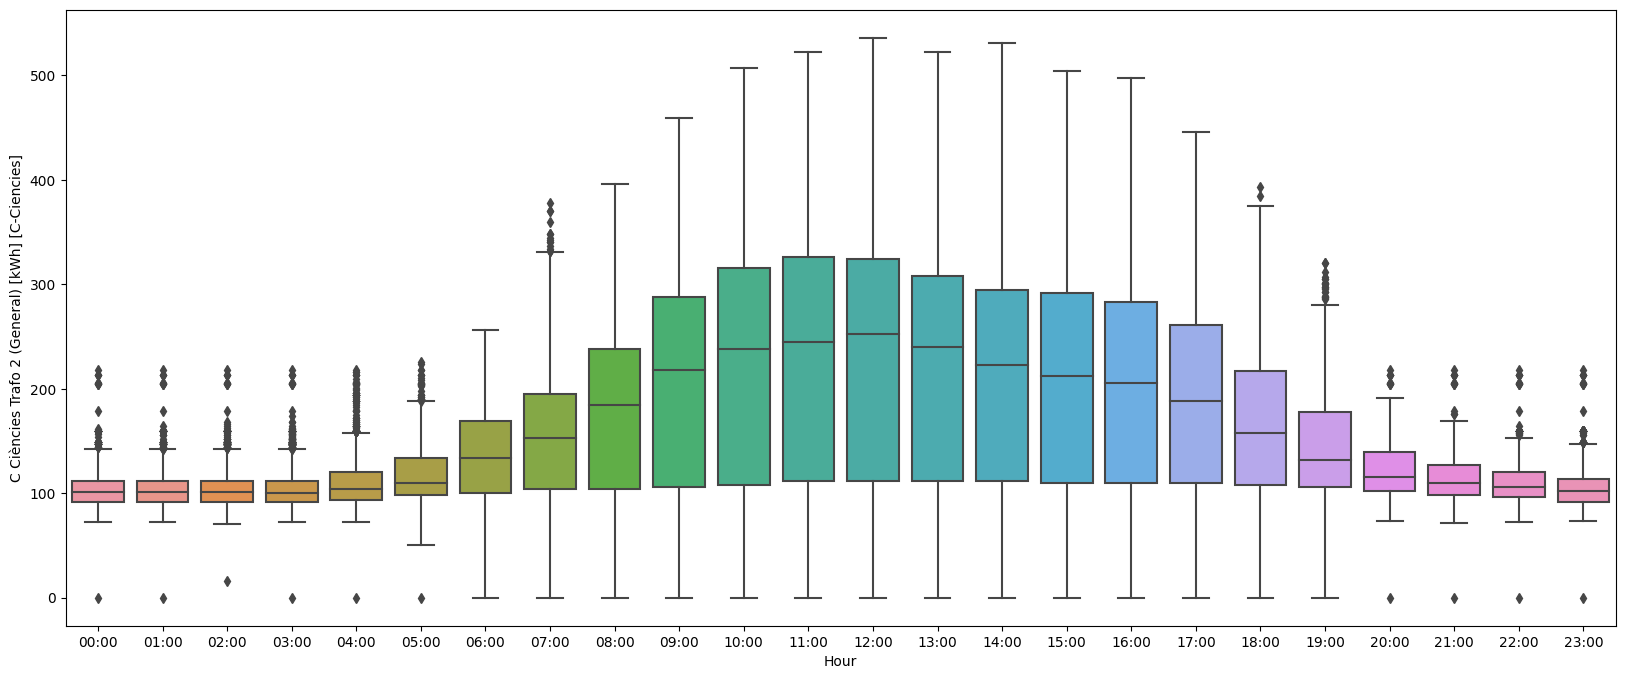

In [37]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=consum_horari, x="Hour", y="C Ciències Trafo 2 (General) [kWh] [C-Ciencies]")

In [38]:
consum_horari['datetime'] = pd.to_datetime(consum_horari['Date'] + ' ' + consum_horari['Hour'], format='%d/%m/%Y %H:%M')
hourly_mean_consumption_trafo1 = consum_horari.groupby(consum_horari['datetime'].dt.hour)['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'].mean()
hourly_mean_consumption_trafo2 = consum_horari.groupby(consum_horari['datetime'].dt.hour)['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'].mean()

print('Trafo 1: \n', hourly_mean_consumption_trafo1, '\n')
print('Trafo 2: \n', hourly_mean_consumption_trafo2, '\n')

Trafo 1: 
 datetime
0     183.295110
1     182.342935
2     181.770953
3     181.093100
4     185.116139
5     191.445674
6     218.614901
7     233.747985
8     265.605104
9     297.473412
10    322.388708
11    335.090865
12    338.800219
13    335.529540
14    323.455115
15    313.294978
16    296.403740
17    277.041577
18    257.521550
19    237.085827
20    217.239118
21    207.258844
22    192.930646
23    188.068565
Name: C Ciències Trafo 1 (General) [kWh] [C-Ciencies], dtype: float64 

Trafo 2: 
 datetime
0     103.917547
1     104.180652
2     104.400438
3     104.909436
4     110.488505
5     116.576030
6     136.500827
7     156.410345
8     181.394299
9     208.805060
10    227.390400
11    233.405000
12    233.714797
13    226.132388
14    217.799096
15    213.357651
16    207.809918
17    194.421451
18    167.520367
19    143.587371
20    119.883160
21    113.247136
22    108.770060
23    104.883844
Name: C Ciències Trafo 2 (General) [kWh] [C-Ciencies], dtype: float64 



In [39]:
hourly_mean_consumption_trafo1

datetime
0     183.295110
1     182.342935
2     181.770953
3     181.093100
4     185.116139
5     191.445674
6     218.614901
7     233.747985
8     265.605104
9     297.473412
10    322.388708
11    335.090865
12    338.800219
13    335.529540
14    323.455115
15    313.294978
16    296.403740
17    277.041577
18    257.521550
19    237.085827
20    217.239118
21    207.258844
22    192.930646
23    188.068565
Name: C Ciències Trafo 1 (General) [kWh] [C-Ciencies], dtype: float64

In [40]:
print('Max hour of consumption in trafo 1:',hourly_mean_consumption_trafo1.idxmax(),"h -", "%.2f" % hourly_mean_consumption_trafo1.max(), "KWh") 
print('Max hour of consumption in trafo 2: ',hourly_mean_consumption_trafo2.idxmax(),"h -", "%.2f" % hourly_mean_consumption_trafo2.max(), "KWh \n")

print('Min hour of consumption in trafo 1: ',hourly_mean_consumption_trafo1.idxmin(),"h -", "%.2f" % hourly_mean_consumption_trafo1.min(), "KWh") 
print('Min hour of consumption in trafo 2: ',hourly_mean_consumption_trafo2.idxmin(),"h -", "%.2f" % hourly_mean_consumption_trafo2.min(), "KWh")

Max hour of consumption in trafo 1: 12 h - 338.80 KWh
Max hour of consumption in trafo 2:  12 h - 233.71 KWh 

Min hour of consumption in trafo 1:  3 h - 181.09 KWh
Min hour of consumption in trafo 2:  0 h - 103.92 KWh


We can see how the hour coincides in both trafos so probably we will need to study what is happening at this hour in order to be able to otimpize it. If we look to the values, we can also observe how the adjacent hours next to the max consumption hour (12) are also high values. We can also observe the minimum consumption hour that it is normal to be an early morning hour.

Let's do from this dataset a new one with the monthly electric consumption:

In [41]:
# We select 3 columns from the original dataset
monthly_data = consum_horari[['Date', 'C Ciències Trafo 1 (General) [kWh] [C-Ciencies]', 'C Ciències Trafo 2 (General) [kWh] [C-Ciencies]']]

# We create a new column to store the data without the days (year-month)
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'], format='%d/%m/%Y')
monthly_data['YearMonth'] = monthly_data['Date'].dt.to_period('M')

# Group the data by YearMonth and sum the hourly consumption for each trafo
monthly_data = monthly_data.groupby(['YearMonth']).agg({'C Ciències Trafo 1 (General) [kWh] [C-Ciencies]': 'sum', 'C Ciències Trafo 2 (General) [kWh] [C-Ciencies]': 'sum'}).reset_index()

# Extract the month from the "YearMonth" column
monthly_data['Month'] = monthly_data['YearMonth'].dt.month

# Group the data by month and calculate the mean of the consumption values
monthly_data_avg = monthly_data.groupby('Month').mean()

# Reset the index to get a dataset with 12 observations
monthly_data_avg = monthly_data_avg.reset_index()

# Print the resulting dataset
print(monthly_data_avg)

    Month  C Ciències Trafo 1 (General) [kWh] [C-Ciencies]  \
0       1                                       188696.438   
1       2                                       182727.970   
2       3                                       182269.088   
3       4                                       157123.762   
4       5                                       175825.564   
5       6                                       198201.860   
6       7                                       233589.946   
7       8                                       146756.310   
8       9                                       191293.572   
9      10                                       183919.444   
10     11                                       179331.054   
11     12                                       157811.846   

    C Ciències Trafo 2 (General) [kWh] [C-Ciencies]  
0                                        124114.296  
1                                        118756.930  
2                              

C:\Users\Miguel\AppData\Local\Temp\ipykernel_24368\2026919293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_data['Date'] = pd.to_datetime(monthly_data['Date'], format='%d/%m/%Y')
C:\Users\Miguel\AppData\Local\Temp\ipykernel_24368\2026919293.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_data['YearMonth'] = monthly_data['Date'].dt.to_period('M')
C:\Users\Miguel\AppData\Local\Temp\ipykernel_24368\2026919293.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.

In [42]:
max_index_trafo1 = monthly_data_avg['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'].idxmax()
max_month_consumption_trafo1 = monthly_data_avg.iloc[max_index_trafo1]['Month']
max_value_trafo1 = monthly_data_avg['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'].max()

min_index_trafo1 = monthly_data_avg['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'].idxmin()
min_month_consumption_trafo1 = monthly_data_avg.iloc[min_index_trafo1]['Month']
min_value_trafo1 = monthly_data_avg['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'].min()

#TRAFO 2
max_index_trafo2 = monthly_data_avg['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'].idxmax()
max_month_consumption_trafo2 = monthly_data_avg.iloc[max_index_trafo2]['Month']
max_value_trafo2 = monthly_data_avg['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'].max()

min_index_trafo2 = monthly_data_avg['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'].idxmin()
min_month_consumption_trafo2 = monthly_data_avg.iloc[min_index_trafo2]['Month']
min_value_trafo2 = monthly_data_avg['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'].min()

print('Max Month Average Consumption for trafo 1 is in Month', int(max_month_consumption_trafo1),'with a value of', max_value_trafo1, 'kWh')
print('Max Month Average Consumption for trafo 2 is in Month', int(max_month_consumption_trafo2),'with a value of', max_value_trafo2, 'kWh', '\n')

print('Min Month Average Consumption for trafo 1 is in Month', int(min_month_consumption_trafo1),'with a value of:', min_value_trafo1, 'kWh')
print('Min Month  Averae Consumption for trafo 2 is Month', int(min_month_consumption_trafo2),'with a value of', min_value_trafo2, 'kWh')

Max Month Average Consumption for trafo 1 is in Month 7 with a value of 233589.946 kWh
Max Month Average Consumption for trafo 2 is in Month 7 with a value of 152272.668 kWh 

Min Month Average Consumption for trafo 1 is in Month 8 with a value of: 146756.31 kWh
Min Month  Averae Consumption for trafo 2 is Month 4 with a value of 98023.144 kWh


Function for max and min calculations:

In [43]:
# we define a function to keep the max and min of both trafos
def max_min(dataset, time):
    #TRAFO 1
    max_index_trafo1 = dataset['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'].idxmax()
    max_month_consumption_trafo1 = dataset.iloc[max_index_trafo1][time]
    max_value_trafo1 = dataset['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'].max()

    min_index_trafo1 = dataset['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'].idxmin()
    min_month_consumption_trafo1 = dataset.iloc[min_index_trafo1][time]
    min_value_trafo1 = dataset['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'].min()

    #TRAFO 2
    max_index_trafo2 = dataset['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'].idxmax()
    max_month_consumption_trafo2 = dataset.iloc[max_index_trafo2][time]
    max_value_trafo2 = dataset['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'].max()

    min_index_trafo2 = dataset['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'].idxmin()
    min_month_consumption_trafo2 = dataset.iloc[min_index_trafo2][time]
    min_value_trafo2 = dataset['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'].min()

    print('Max Month Consumption for trafo 1 is in Month', max_month_consumption_trafo1,'with a value of', max_value_trafo1, 'kWh')
    print('Max Month Consumption for trafo 2 is in Month', max_month_consumption_trafo2,'with a value of', max_value_trafo2, 'kWh', '\n')

    print('Min Month Consumption for trafo 1 is in Month', min_month_consumption_trafo1,'with a value of', min_value_trafo1, 'kWh')
    print('Min Month Consumption for trafo 2 is Month', min_month_consumption_trafo2,'with a value of', min_value_trafo2, 'kWh')

In [44]:
print('This are the max and min month consumption during the 5 years', '\n')
max_min(monthly_data, 'YearMonth')

This are the max and min month consumption during the 5 years 

Max Month Consumption for trafo 1 is in Month 2019-07 with a value of 273337.72 kWh
Max Month Consumption for trafo 2 is in Month 2018-07 with a value of 172216.38 kWh 

Min Month Consumption for trafo 1 is in Month 2020-04 with a value of 88937.95 kWh
Min Month Consumption for trafo 2 is Month 2020-04 with a value of 60131.45 kWh


Monthly consumption in 2022:

In [45]:
monthly_data_2022 = monthly_data[monthly_data['YearMonth'].dt.year==2022].reset_index()
print('The the max and min month consumption in 2022', '\n')
max_min(monthly_data_2022, 'YearMonth')

The the max and min month consumption in 2022 

Max Month Consumption for trafo 1 is in Month 2022-07 with a value of 230364.0 kWh
Max Month Consumption for trafo 2 is in Month 2022-07 with a value of 144296.0 kWh 

Min Month Consumption for trafo 1 is in Month 2022-08 with a value of 134079.92 kWh
Min Month Consumption for trafo 2 is Month 2022-04 with a value of 93276.04 kWh


The month with highest energy consumption in 2022 in both trafos is July. Then in trafo 1 the month with lowest energy consumption is August and in trafo 2 April.

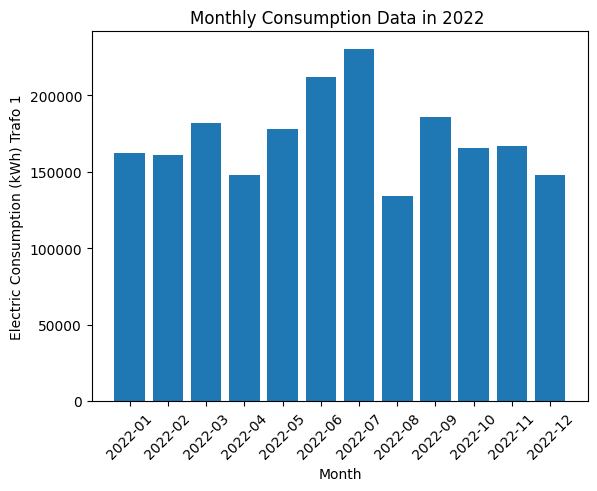

In [46]:
# We convert the yearmonth values to string only for the plot 
# TRAFO 1
plt.bar(monthly_data_2022['YearMonth'].astype(str), monthly_data_2022['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'], width=0.8)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Electric Consumption (kWh) Trafo 1")
plt.title("Monthly Consumption Data in 2022 ")
plt.show()

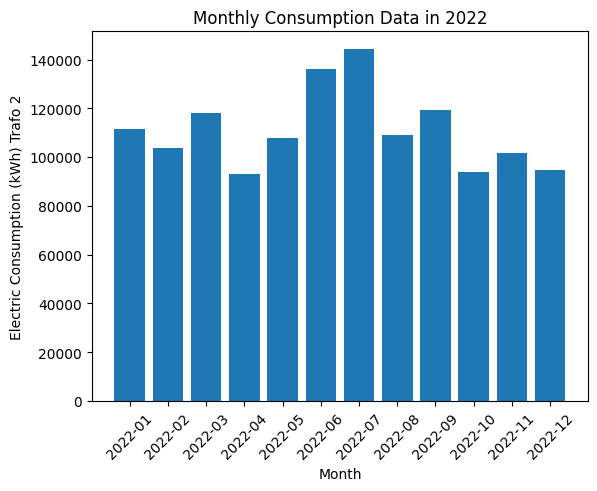

In [47]:
# We convert the yearmonth values to string only for the plot
#TRAFO 2
plt.bar(monthly_data_2022['YearMonth'].astype(str), monthly_data_2022['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'], width=0.8)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Electric Consumption (kWh) Trafo 2")
plt.title("Monthly Consumption Data in 2022")
plt.show()

Monthly consumption in COVID period (started at march 2020):

In [48]:
monthly_data_covid = monthly_data[26:38].reset_index() # We pick 1 year period from the start of the pandemia
print('The max and min month consumption in the covid period', '\n')
max_min(monthly_data_covid, 'YearMonth')

The max and min month consumption in the covid period 

Max Month Consumption for trafo 1 is in Month 2020-07 with a value of 188052.0 kWh
Max Month Consumption for trafo 2 is in Month 2020-07 with a value of 121752.0 kWh 

Min Month Consumption for trafo 1 is in Month 2020-04 with a value of 88937.95 kWh
Min Month Consumption for trafo 2 is Month 2020-04 with a value of 60131.45 kWh


The month with highest energy consumption in the Covid period in both trafos is July and the lowest energy consmption in both trafos is April.

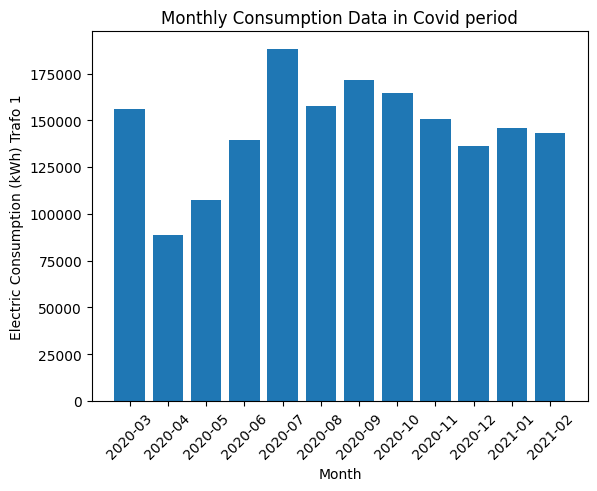

In [49]:
# We convert the yearmonth values to string only for the plot 
# TRAFO 1
plt.bar(monthly_data_covid['YearMonth'].astype(str), monthly_data_covid['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'], width=0.8)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Electric Consumption (kWh) Trafo 1")
plt.title("Monthly Consumption Data in Covid period")
plt.show()

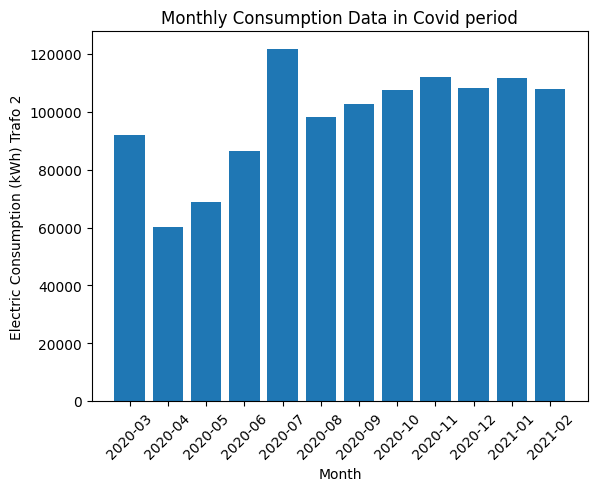

In [50]:
# We convert the yearmonth values to string only for the plot 
plt.bar(monthly_data_covid['YearMonth'].astype(str), monthly_data_covid['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'], width=0.8)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Electric Consumption (kWh) Trafo 2")
plt.title("Monthly Consumption Data in Covid period")
plt.show()

Now Let's calculate in what percentage the energy consumption has been reduced during the covid year in relation to a normal year as 2022:

In [51]:
total_consumption2022_trafo1 = monthly_data_2022['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'].sum()
total_consumption2022_trafo2 = monthly_data_2022['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'].sum()

total_consumptionCovid_trafo1 = monthly_data_covid['C Ciències Trafo 1 (General) [kWh] [C-Ciencies]'].sum()
total_consumptionCovid_trafo2 = monthly_data_covid['C Ciències Trafo 2 (General) [kWh] [C-Ciencies]'].sum()

reduction_percentage_trafo1 = "%.2f" % (((total_consumption2022_trafo1 - total_consumptionCovid_trafo1)/total_consumption2022_trafo1)*100)
reduction_percentage_trafo2 = "%.2f" % (((total_consumption2022_trafo2 - total_consumptionCovid_trafo2)/total_consumption2022_trafo2)*100)

print("The total percentage reduction of energy consumption in trafo 1 during the Covid period with respect to a current year like    2022 is:",reduction_percentage_trafo1,"% \n")
print("The total percentage reduction of energy consumption in trafo 2 during the Covid period with respect to a current year like    2022 is:",reduction_percentage_trafo2,"%")

The total percentage reduction of energy consumption in trafo 1 during the Covid period with respect to a current year like    2022 is: 15.70 % 

The total percentage reduction of energy consumption in trafo 2 during the Covid period with respect to a current year like    2022 is: 11.68 %
